# Libraries

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN,KMeans,Birch,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.NetworkDraw import *
pd.set_option('display.max_columns', None)

# Data Cleaning

In [3]:
df = pd.read_csv(r"../data/processed/UserProcessed.csv")
df.head()

,UserId,UserName,DisplayName,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,368,antgoldbloom,Anthony Goldbloom,0.333333,1.000000,0.143779,1.000000,1.000000,0.510318,0.510318,7.935216e-21,1.000000,1.000000,0.173579,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1
1,381,iguyon,Isabelle,0.333333,0.019711,0.000000,0.019711,0.012926,0.000000,0.000000,0.000000e+00,0.213330,0.213330,0.007540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123067,0.534590,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
2,389,anandjeyahar,Anand Jeyahar,0.000000,0.006570,0.000000,0.006570,0.004479,0.127579,0.127579,7.935216e-21,0.111385,0.111385,0.004787,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010087,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,1
3,392,jmeynet,Julien Meynet,0.666667,0.003285,0.000000,0.003285,0.006241,0.000000,0.000000,0.000000e+00,0.047197,0.047197,0.000177,0.731685,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020173,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
4,394,m4xl1n,m4xl1n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194147 entries, 0 to 194146
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UserId                    194147 non-null  int64  
 1   UserName                  194147 non-null  object 
 2   DisplayName               194147 non-null  object 
 3   PerformanceTier           194147 non-null  float64
 4   in_degree_followers       194147 non-null  float64
 5   out_degree_followers      194147 non-null  float64
 6   in_degree_cent_followers  194147 non-null  float64
 7   pagerank_cent_followers   194147 non-null  float64
 8   degree_teams              194147 non-null  float64
 9   degree_cent_teams         194147 non-null  float64
 10  eigenvector_cent_teams    194147 non-null  float64
 11  degree_forums             194147 non-null  float64
 12  degree_cent_forums        194147 non-null  float64
 13  eigenvector_cent_forums   194147 non-null  f

In [5]:
df.drop(columns=["UserId","UserName","DisplayName"],inplace=True)
df.head()

,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,0.333333,1.000000,0.143779,1.000000,1.000000,0.510318,0.510318,7.935216e-21,1.000000,1.000000,0.173579,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1
1,0.333333,0.019711,0.000000,0.019711,0.012926,0.000000,0.000000,0.000000e+00,0.213330,0.213330,0.007540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123067,0.534590,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
2,0.000000,0.006570,0.000000,0.006570,0.004479,0.127579,0.127579,7.935216e-21,0.111385,0.111385,0.004787,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010087,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,1
3,0.666667,0.003285,0.000000,0.003285,0.006241,0.000000,0.000000,0.000000e+00,0.047197,0.047197,0.000177,0.731685,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020173,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


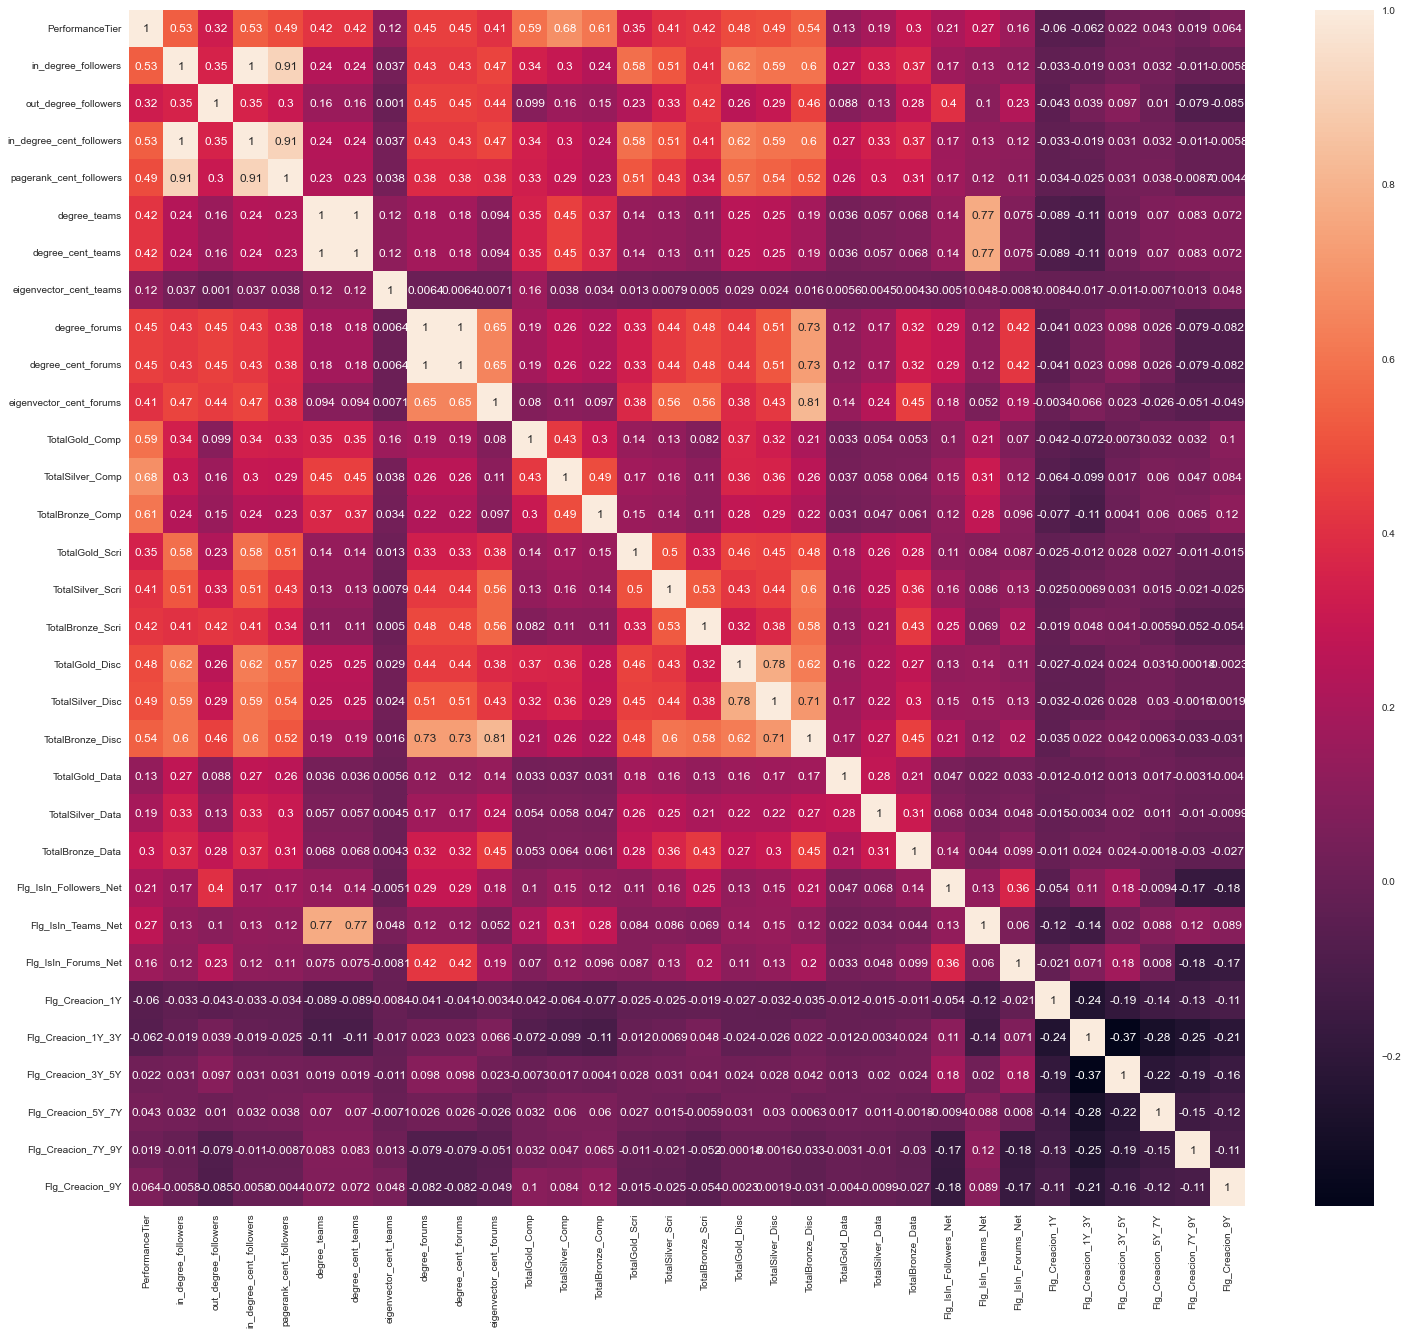

In [6]:
corrMatrix = df.corr()
plt.figure(figsize=[25,22])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
df.shape

(194147, 32)

# PCA

[0.22420334 0.168109   0.125758   0.09490934 0.08524684 0.06942515
 0.05979623 0.04791371 0.04153359 0.02072111]
La cantidad de PC que explican el 90 % de varianza: 8


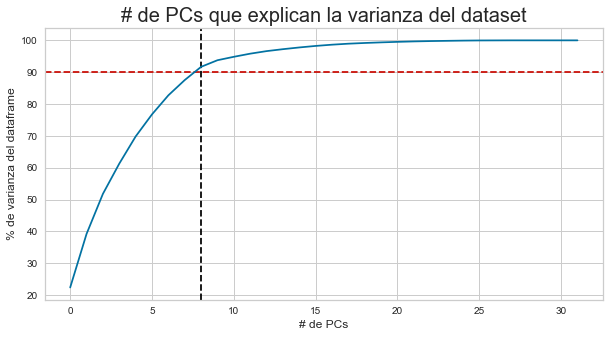

In [8]:
pca = PCA()
pca.fit(df)

#imprimir los valores de varianza de los 10 primeros PC
print(pca.explained_variance_ratio_[:10])

#acumular varianzas
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

#cuantas PC explican el 80% del dataset
k = np.argmax(var_cumu>90)
print("La cantidad de PC que explican el 90 % de varianza:",k)

plt.figure(figsize=[10,5])
plt.ylabel("% de varianza del dataframe", size=12)
plt.xlabel("# de PCs", size=12)
plt.title("# de PCs que explican la varianza del dataset", size=20)
plt.axvline(x=k, color='black', linestyle='--')
plt.axhline(y=90, color='r', linestyle='--')
ax = plt.plot(var_cumu)

In [9]:
print(pca.n_components_)

32


In [10]:
df_aux = pd.DataFrame(data = pca.components_,columns= df.columns)
df_aux.shape

(32, 32)

In [11]:
df_aux.head()

,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,0.056906,0.021458,0.090043,0.021458,0.019299,0.077701,0.077701,0.000058,0.132915,0.132915,0.038976,0.027412,0.058364,0.053860,0.021028,0.043108,0.076759,0.025547,0.032553,0.054515,0.004383,0.009547,0.029943,0.630372,0.153198,0.632789,-0.059509,0.083849,0.233841,-0.012078,-0.139626,-0.106476
1,0.038785,0.008791,0.003129,0.008791,0.008400,0.136990,0.136990,0.001237,0.011018,0.011018,-0.004394,0.033163,0.066613,0.073790,0.007985,0.008047,-0.002873,0.013260,0.015116,0.008080,0.001720,0.002524,0.000318,-0.058057,0.333532,-0.056877,0.042917,-0.801253,0.364036,0.162551,0.142055,0.089694
2,0.077326,0.019688,0.024858,0.019688,0.017663,0.276236,0.276236,0.002472,0.028325,0.028325,0.014152,0.059673,0.112536,0.116330,0.017040,0.026126,0.025867,0.028330,0.031804,0.031675,0.002413,0.005457,0.012584,0.066812,0.642792,-0.161615,-0.123576,0.234510,-0.489040,0.143623,0.150202,0.084281
3,0.003984,0.001393,-0.021478,0.001393,0.000310,-0.042406,-0.042406,-0.000344,0.068017,0.068017,0.009634,0.001442,0.004669,0.009087,0.003370,0.005994,0.005296,0.004035,0.006278,0.010595,0.000709,0.000423,0.000759,-0.396503,-0.107311,0.610310,0.190666,-0.173476,-0.438955,0.431072,-0.007937,-0.001370
4,-0.009517,0.001298,0.040283,0.001298,0.003154,-0.101689,-0.101689,-0.001153,-0.030091,-0.030091,-0.002157,-0.010389,-0.024234,-0.023685,0.000120,0.003012,0.014730,-0.003157,-0.003534,-0.002986,0.001494,0.001524,0.006259,0.591441,-0.245326,-0.357255,0.203398,-0.215764,-0.307775,0.488740,-0.105151,-0.063448


In [12]:
pca_t = PCA(n_components=8,random_state=66) #calculamos con 6 pues es el valor que nos da 95%
transf = pca_t.fit_transform(df) #transformamos del original (28) al nuevo de 6 perdiendo un 5%
df_pca = pd.DataFrame(data = transf, columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8'])
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,1.312447,0.643769,1.088640,0.174327,-0.142414,0.389265,-0.451135,1.461166
1,0.547082,0.087823,-0.086020,0.188705,0.223579,0.265847,-0.204695,1.072573
2,0.640604,0.434747,0.574472,0.048983,-0.036440,0.212813,-0.397070,0.671758
3,0.567138,0.181639,0.065465,0.166815,0.200493,0.277085,-0.246035,1.157473
4,-0.806238,0.202791,-0.007373,-0.060964,-0.000242,0.000605,-0.367601,0.855854


In [20]:
#Guardamos el PCA
filename = r'../models/pca_model.pkl'
pickle.dump(pca_t, open(filename, 'wb'))

In [13]:
print('Explained variation per principal component: {}'.format(pca_t.explained_variance_ratio_))

Explained variation per principal component: [0.22420334 0.168109   0.125758   0.09490934 0.08524684 0.06942515
 0.05979623 0.04791371]


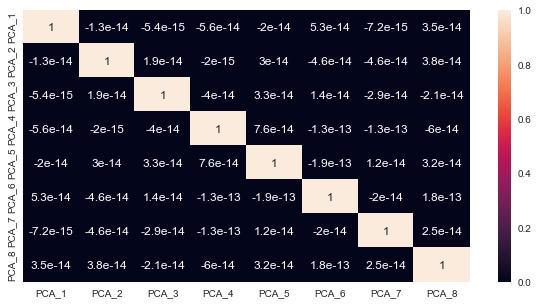

In [14]:
corrMatrix = df_pca.corr()
plt.figure(figsize=[10,5])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
df_pca.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
count,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05
mean,-5.665399e-17,3.454868e-17,-2.119767e-16,6.089938e-17,1.475639e-16,-4.684567e-18,-1.897250e-16,-2.775606e-16
std,6.261759e-01,5.422141e-01,4.689679e-01,4.074082e-01,3.861130e-01,3.484446e-01,3.233793e-01,2.894711e-01
min,-8.594452e-01,-8.292981e-01,-7.857572e-01,-1.094900e+00,-1.083149e+00,-6.334765e-01,-8.950199e-01,-7.273630e-01
25%,-6.359694e-01,-7.124197e-01,-2.588923e-01,-2.341242e-01,-2.429719e-01,-1.924169e-01,-1.596561e-01,-1.234063e-01
50%,-1.034562e-03,1.785264e-01,8.306192e-03,-2.708954e-02,-1.260788e-02,-5.425565e-02,5.215861e-03,-5.475942e-02
75%,6.323371e-01,3.952355e-01,9.951263e-02,3.557610e-01,2.741760e-01,9.183337e-02,9.202336e-02,5.798178e-02
max,2.015485e+00,1.261659e+00,1.874212e+00,1.119021e+00,1.193376e+00,1.016958e+00,9.210926e-01,2.096303e+00


In [16]:
df_pca_scaled = df_pca.copy()
#Escalamos la data numerica entre 0-1
scaler = MinMaxScaler()
df_pca_scaled[df_pca_scaled.columns] = scaler.fit_transform(df_pca_scaled[df_pca_scaled.columns])
df_pca_scaled.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
count,194147.000000,194147.000000,194147.000000,194147.000000,194147.000000,194147.000000,194147.000000,194147.000000
mean,0.298945,0.396612,0.295401,0.494552,0.475790,0.383824,0.492822,0.257595
std,0.217806,0.259314,0.176306,0.184021,0.169606,0.211123,0.178061,0.102516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077733,0.055897,0.198072,0.388802,0.369061,0.267239,0.404911,0.213891
50%,0.298585,0.481992,0.298523,0.482316,0.470252,0.350951,0.495694,0.238202
75%,0.518893,0.585633,0.332812,0.655245,0.596227,0.439466,0.543492,0.278130
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# K-Means - Finding best K

In [21]:
df_pca_scaled.shape

(194147, 8)

In [22]:
df.shape

(194147, 32)

### Evaluacion con PCA

In [ ]:
df_pca_scaled_filt = df_pca_scaled
df_f_kmeans = df_pca_scaled_filt.copy()

kmeans = KMeans(init='k-means++',random_state = 66)
plt.figure(figsize=[10,5])
elb_visualizer = KElbowVisualizer(kmeans, k=(2,21))
elb_visualizer.fit(df_f_kmeans)
elb_visualizer.show()

In [ ]:
k_cluster = [5,6,7,8]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans)
    sil = silhouette_score(df_f_kmeans,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 5 calculated: 0.4451996321008333
silhouette for 6 calculated: 0.468237538786611
silhouette for 7 calculated: 0.4492955324530487
silhouette for 8 calculated: 0.4674381126649471


No logramos obtener un buen resultado de silueta usando PCA por lo que consideramos buscar combinacion de las variables origianles del dataset

### Evaluacion con dataset original, quitando columnas correlacionadas

In [19]:
df.columns

Index(['PerformanceTier', 'in_degree_followers', 'out_degree_followers',
       'in_degree_cent_followers', 'pagerank_cent_followers', 'degree_teams',
       'degree_cent_teams', 'eigenvector_cent_teams', 'degree_forums',
       'degree_cent_forums', 'eigenvector_cent_forums', 'TotalGold_Comp',
       'TotalSilver_Comp', 'TotalBronze_Comp', 'TotalGold_Scri',
       'TotalSilver_Scri', 'TotalBronze_Scri', 'TotalGold_Disc',
       'TotalSilver_Disc', 'TotalBronze_Disc', 'TotalGold_Data',
       'TotalSilver_Data', 'TotalBronze_Data', 'Flg_IsIn_Followers_Net',
       'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net', 'Flg_Creacion_1Y',
       'Flg_Creacion_1Y_3Y', 'Flg_Creacion_3Y_5Y', 'Flg_Creacion_5Y_7Y',
       'Flg_Creacion_7Y_9Y', 'Flg_Creacion_9Y'],
      dtype='object')

In [22]:

cols_filt     = ['PerformanceTier', #'in_degree_followers', 'out_degree_followers','in_degree_cent_followers',
                'pagerank_cent_followers', #'degree_teams','degree_cent_teams',
                'eigenvector_cent_teams', #'degree_forums','degree_cent_forums',
                'eigenvector_cent_forums', 'TotalGold_Comp',
                'TotalSilver_Comp', 'TotalBronze_Comp', 'TotalGold_Scri',
                'TotalSilver_Scri', 'TotalBronze_Scri', 'TotalGold_Disc',
                'TotalSilver_Disc', 'TotalBronze_Disc', 'TotalGold_Data',
                'TotalSilver_Data', 'TotalBronze_Data', 'Flg_IsIn_Followers_Net',
                'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net', 'Flg_Creacion_1Y',
                'Flg_Creacion_1Y_3Y', 'Flg_Creacion_3Y_5Y', 'Flg_Creacion_5Y_7Y',
                'Flg_Creacion_7Y_9Y', 'Flg_Creacion_9Y']

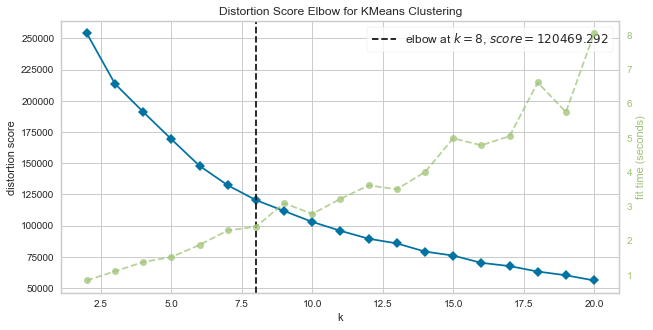

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
df_f_kmeans = df[cols_filt].copy()

kmeans = KMeans(init='k-means++',random_state = 66)
plt.figure(figsize=[10,5])
elb_visualizer = KElbowVisualizer(kmeans, k=(2,21))
elb_visualizer.fit(df_f_kmeans)
elb_visualizer.show()

In [24]:
k_cluster = [7,8,9]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans)
    sil = silhouette_score(df_f_kmeans,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 7 calculated: 0.39947980372716696
silhouette for 8 calculated: 0.4137168807390336
silhouette for 9 calculated: 0.4277832071853832


El resultado para la silueta no es el esperado usando casi todas las columnas del dataset original por lo cual probaremos otra combinacion de variables

### Evaluacion con dataset original, solo con metricas de las redes

In [26]:

cols_filt     = ['PerformanceTier', 'pagerank_cent_followers', 'eigenvector_cent_teams', 'eigenvector_cent_forums', 
                 #'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp', 
                 'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net']

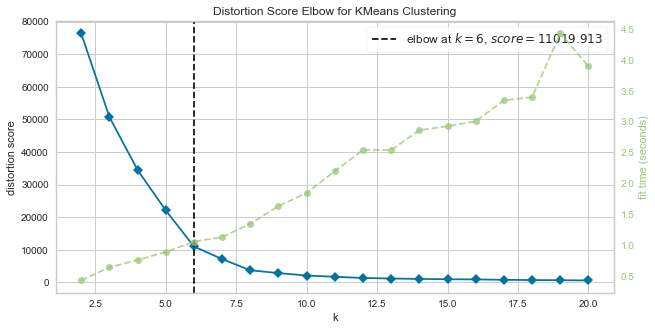

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
df_f_kmeans = df[cols_filt].copy()

kmeans = KMeans(init='k-means++',random_state = 66)
plt.figure(figsize=[10,5])
elb_visualizer = KElbowVisualizer(kmeans, k=(2,21))
elb_visualizer.fit(df_f_kmeans)
elb_visualizer.show()

In [29]:
k_cluster = [6,7,8]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans)
    sil = silhouette_score(df_f_kmeans,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 6 calculated: 0.8702455167198138
silhouette for 7 calculated: 0.9034171254737755
silhouette for 8 calculated: 0.936323289537758


En esta oportunidad obtenemos valores de silueta esperados (> 0.8) por lo que consideramos esta combinacion de variable como optima, sin embargo evaluaremos una ultima combinacion

### Evaluacion con dataset original, con metricas de las redes y antiguedad

In [30]:

cols_filt     = ['PerformanceTier', 'pagerank_cent_followers', 'eigenvector_cent_teams', 'eigenvector_cent_forums', 
                 #'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp', 
                 'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net',
                 'Flg_Creacion_1Y_3Y', 'Flg_Creacion_3Y_5Y', 'Flg_Creacion_5Y_7Y','Flg_Creacion_7Y_9Y']

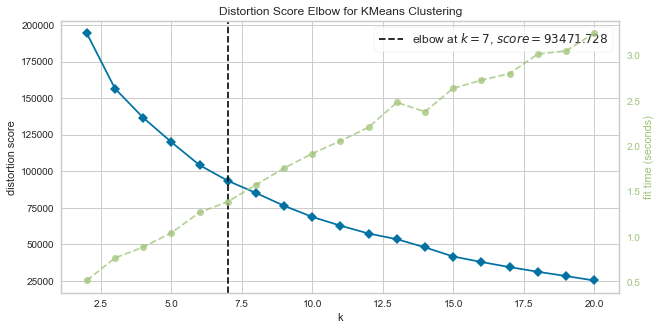

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
df_f_kmeans = df[cols_filt].copy()

kmeans = KMeans(init='k-means++',random_state = 66)
plt.figure(figsize=[10,5])
elb_visualizer = KElbowVisualizer(kmeans, k=(2,21))
elb_visualizer.fit(df_f_kmeans)
elb_visualizer.show()

In [32]:
k_cluster = [6,7,8]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans)
    sil = silhouette_score(df_f_kmeans,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 6 calculated: 0.37413041376645434
silhouette for 7 calculated: 0.4007692334872895
silhouette for 8 calculated: 0.4426450494147279


No se obtienen los resultados esperados agregando las nuevas varibales x lo que nos quedamos con la combinacion previa de solo metricas de los grafos

# K-Means - Modeling

In [23]:

cols_filt = ['PerformanceTier', 'pagerank_cent_followers', 'eigenvector_cent_teams', 'eigenvector_cent_forums',
             'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net']
df_f_kmeans = df[cols_filt].copy()

In [24]:
kmeans = KMeans(n_clusters=7, random_state = 66)
cluster_labels = kmeans.fit_predict(df_f_kmeans)
df_f_kmeans_2 = df[cols_filt].copy()
df_f_kmeans_2["Cluster"] = cluster_labels
df_f_kmeans_2["Cluster"] = df_f_kmeans_2["Cluster"].astype(str)

In [25]:
#Guardamos el K-Means
filename = r'../models/kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [26]:
df_f_kmeans_2["Cluster"].value_counts()

1    58866
3    42806
2    35723
5    21896
0    17091
6    12101
4     5664
Name: Cluster, dtype: int64

In [27]:
df_f_kmeans.head()

,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,0.333333,1.000000,7.935216e-21,0.173579,1.0,1.0,1.0
1,0.333333,0.012926,0.000000e+00,0.007540,1.0,0.0,1.0
2,0.000000,0.004479,7.935216e-21,0.004787,1.0,1.0,1.0
3,0.666667,0.006241,0.000000e+00,0.000177,1.0,0.0,1.0
4,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0


In [28]:
df_f_kmeans_2.head()

,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Cluster
0,0.333333,1.000000,7.935216e-21,0.173579,1.0,1.0,1.0,0
1,0.333333,0.012926,0.000000e+00,0.007540,1.0,0.0,1.0,3
2,0.000000,0.004479,7.935216e-21,0.004787,1.0,1.0,1.0,0
3,0.666667,0.006241,0.000000e+00,0.000177,1.0,0.0,1.0,3
4,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,1


In [ ]:
sil = silhouette_score(df_f_kmeans,cluster_labels)
print("silhouette is: "+str(sil))

In [14]:
distances = pairwise_distances(df_f_kmeans, kmeans.cluster_centers_, metric='euclidean')

In [15]:
df_distances = pd.DataFrame(distances,columns=["C0","C1","C2","C3","C4","C5","C6"])
df_distances.head()

,C0,C1,C2,C3,C4,C5,C6
0,0.981607,2.034501,1.770300,1.442477,1.453581,1.662218,1.768284
1,1.017818,1.452339,1.052108,0.300203,1.443930,1.065766,1.759807
2,0.163859,1.732066,1.414241,1.001345,1.000902,1.284320,1.414411
3,1.126627,1.562171,1.198255,0.632967,1.545975,1.206466,1.848010
4,1.740029,0.003086,1.000059,1.415332,1.414856,1.018943,1.000258


In [16]:
df_f_kmeans_3 = df_f_kmeans_2.copy()

df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "0", 'Distance')] = df_distances["C0"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "1", 'Distance')] = df_distances["C1"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "2", 'Distance')] = df_distances["C2"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "3", 'Distance')] = df_distances["C3"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "4", 'Distance')] = df_distances["C4"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "5", 'Distance')] = df_distances["C5"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "6", 'Distance')] = df_distances["C6"]

In [17]:
df_f_kmeans_3.head()

,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Cluster,Distance
0,0.333333,1.000000,7.935216e-21,0.173579,1.0,1.0,1.0,0,0.981607
1,0.333333,0.012926,0.000000e+00,0.007540,1.0,0.0,1.0,3,0.300203
2,0.000000,0.004479,7.935216e-21,0.004787,1.0,1.0,1.0,0,0.163859
3,0.666667,0.006241,0.000000e+00,0.000177,1.0,0.0,1.0,3,0.632967
4,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,1,0.003086


In [18]:
df_f_kmeans_3['Distance_Rank'] = df_f_kmeans_3.groupby('Cluster')['Distance'].rank(ascending=False,method='min')
df_f_kmeans_3.head()

,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Cluster,Distance,Distance_Rank
0,0.333333,1.000000,7.935216e-21,0.173579,1.0,1.0,1.0,0,0.981607,382.0
1,0.333333,0.012926,0.000000e+00,0.007540,1.0,0.0,1.0,3,0.300203,3438.0
2,0.000000,0.004479,7.935216e-21,0.004787,1.0,1.0,1.0,0,0.163859,10206.0
3,0.666667,0.006241,0.000000e+00,0.000177,1.0,0.0,1.0,3,0.632967,958.0
4,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,1,0.003086,523.0


In [19]:
df_f_kmeans_3[df_f_kmeans_3["Cluster"]=="1"].sort_values(["Distance_Rank"]).head(10)

,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Cluster,Distance,Distance_Rank
9851,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
3096,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
7698,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
7217,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
17985,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
647,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
10897,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
8610,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
16284,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0
2341,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1,0.663581,1.0


# Perfilamiento de clusters

In [20]:
df_pre = pd.read_csv(r"../data/processed/UserPreProcessed.csv")
df_pre.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,5.427340e-23,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0
1,381,iguyon,Isabelle,2,9Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,392,jmeynet,Julien Meynet,3,9Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,394,m4xl1n,m4xl1n,1,9Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_per = df_pre.copy()
df_per["Cluster"] = df_f_kmeans_3["Cluster"]
df_per["Distance"] = df_f_kmeans_3["Distance"]
df_per["Distance_Rank"] = df_f_kmeans_3["Distance_Rank"]
df_per["Flg_IsIn_Followers_Net"] = df_f_kmeans_3["Flg_IsIn_Followers_Net"]
df_per["Flg_IsIn_Teams_Net"] = df_f_kmeans_3["Flg_IsIn_Teams_Net"]
df_per["Flg_IsIn_Forums_Net"] = df_f_kmeans_3["Flg_IsIn_Forums_Net"]

In [22]:
df_per_c0 = df_per[df_per["Cluster"]=="0"]
df_per_c1 = df_per[df_per["Cluster"]=="1"]
df_per_c2 = df_per[df_per["Cluster"]=="2"]
df_per_c3 = df_per[df_per["Cluster"]=="3"]
df_per_c4 = df_per[df_per["Cluster"]=="4"]
df_per_c5 = df_per[df_per["Cluster"]=="5"]
df_per_c6 = df_per[df_per["Cluster"]=="6"]

In [23]:
df_per.columns

Index(['UserId', 'UserName', 'DisplayName', 'PerformanceTier', 'Flg_Creacion',
       'in_degree_followers', 'out_degree_followers',
       'in_degree_cent_followers', 'pagerank_cent_followers', 'degree_teams',
       'degree_cent_teams', 'eigenvector_cent_teams', 'degree_forums',
       'degree_cent_forums', 'eigenvector_cent_forums', 'TotalGold_Comp',
       'TotalSilver_Comp', 'TotalBronze_Comp', 'TotalGold_Scri',
       'TotalSilver_Scri', 'TotalBronze_Scri', 'TotalGold_Disc',
       'TotalSilver_Disc', 'TotalBronze_Disc', 'TotalGold_Data',
       'TotalSilver_Data', 'TotalBronze_Data', 'Cluster', 'Distance',
       'Distance_Rank', 'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net',
       'Flg_IsIn_Forums_Net'],
      dtype='object')

In [24]:
cols_num = ['PerformanceTier', 'pagerank_cent_followers', 'eigenvector_cent_teams', 'eigenvector_cent_forums',
            'in_degree_followers', 'out_degree_followers','degree_teams','degree_forums',
             'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net']

In [25]:
df_f_kmeans_3.columns

Index(['PerformanceTier', 'pagerank_cent_followers', 'eigenvector_cent_teams',
       'eigenvector_cent_forums', 'Flg_IsIn_Followers_Net',
       'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net', 'Cluster', 'Distance',
       'Distance_Rank'],
      dtype='object')

In [26]:
cols_scat = ['PerformanceTier', 'pagerank_cent_followers', 'eigenvector_cent_teams',
       'eigenvector_cent_forums', 'Flg_IsIn_Followers_Net',
       'Flg_IsIn_Teams_Net', 'Flg_IsIn_Forums_Net','Cluster']

In [51]:
sns.set_theme(style="ticks")
plt.figure(figsize=[30,30])
sns.pairplot(df_f_kmeans_3[cols_scat], hue="Cluster")
plt.show()

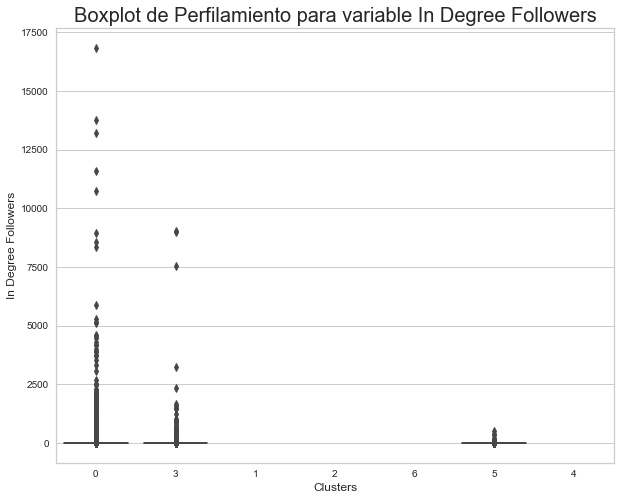

In [27]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='in_degree_followers')
plt.title("Boxplot de Perfilamiento para variable In Degree Followers",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("In Degree Followers",size=12)
plt.show()

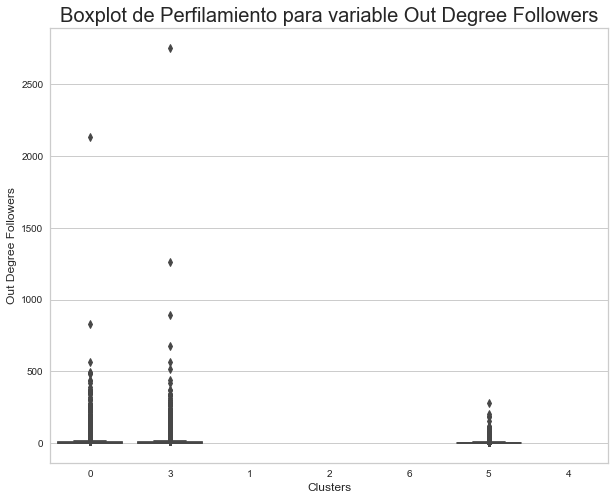

In [28]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='out_degree_followers')
plt.title("Boxplot de Perfilamiento para variable Out Degree Followers",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("Out Degree Followers",size=12)
plt.show()

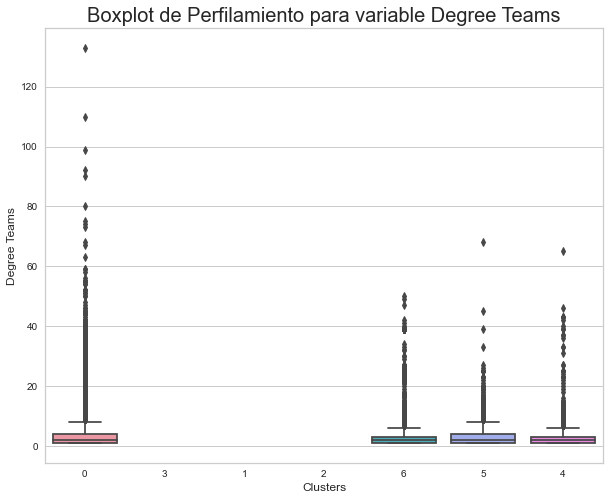

In [29]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='degree_teams')
plt.title("Boxplot de Perfilamiento para variable Degree Teams",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("Degree Teams",size=12)
plt.show()

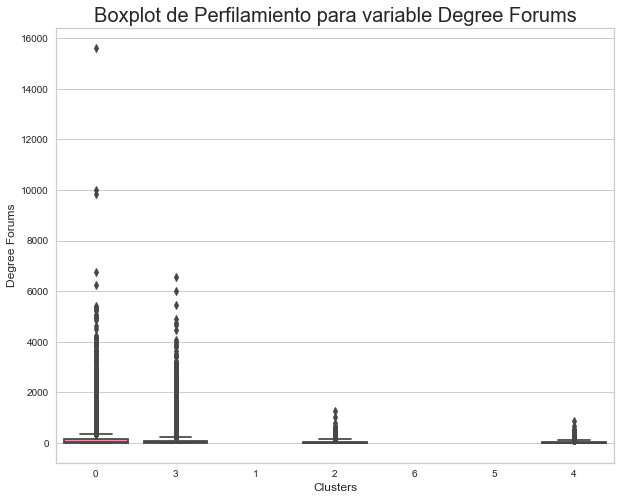

In [30]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='degree_forums')
plt.title("Boxplot de Perfilamiento para variable Degree Forums",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("Degree Forums",size=12)
plt.show()

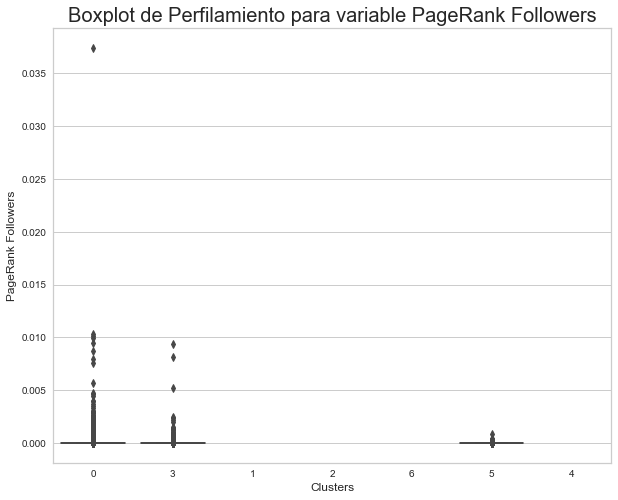

In [31]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='pagerank_cent_followers')
plt.title("Boxplot de Perfilamiento para variable PageRank Followers",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("PageRank Followers",size=12)
plt.show()

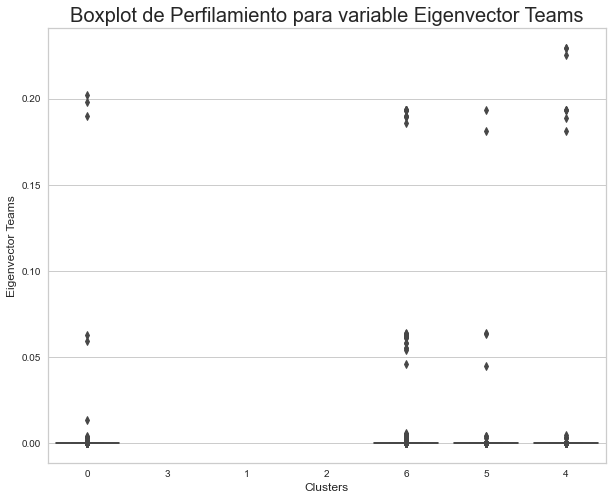

In [33]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='eigenvector_cent_teams')
plt.title("Boxplot de Perfilamiento para variable Eigenvector Teams",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("Eigenvector Teams",size=12)
plt.show()

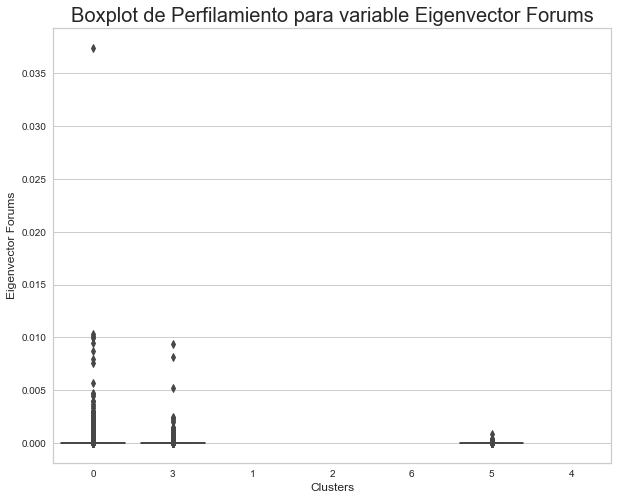

In [34]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df_per,x="Cluster",y='eigenvector_cent_followers')
plt.title("Boxplot de Perfilamiento para variable Eigenvector Forums",size=20)
plt.xlabel("Clusters",size=12)
plt.ylabel("Eigenvector Forums",size=12)
plt.show()

In [84]:
Validator.validar_numerico(df_per,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,194147,0,0.00,0,0.0,4,1.08,1.0,4.00,1.0,2.08,1.0,1.0,1.0,1.0,1.0,2.0,3.00,13612,7.01,2445,1.26,13612,7.01,2445,1.26,349,0.18
0,pagerank_cent_followers,194147,112354,57.87,0,0.0,28173,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9554,4.92,173,0.09,8180,4.21,4090,2.11,818,0.42
0,eigenvector_cent_teams,194147,155035,79.85,0,0.0,5719,0.00,0.0,0.23,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9144,4.71,44,0.02,3912,2.01,1956,1.01,392,0.20
0,eigenvector_cent_forums,194147,92863,47.83,0,0.0,63795,0.00,0.0,0.38,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,10522,5.42,481,0.25,10129,5.22,5065,2.61,1013,0.52
0,in_degree_followers,194147,112354,57.87,0,0.0,542,9.36,0.0,16840.00,5.0,471.77,0.0,0.0,1.0,2.0,8.0,18.0,103.08,10641,5.48,208,0.11,7487,3.86,3903,2.01,818,0.42
0,out_degree_followers,194147,112354,57.87,0,0.0,248,5.13,0.0,2756.00,8.5,64.96,0.0,1.0,2.0,4.0,11.0,20.0,54.00,10991,5.66,607,0.31,7967,4.10,3856,1.99,813,0.42
0,degree_teams,194147,155035,79.85,0,0.0,70,3.33,1.0,133.00,8.5,16.57,1.0,1.0,2.0,4.0,6.0,10.0,23.00,2392,1.23,701,0.36,3841,1.98,1634,0.84,361,0.19
0,degree_forums,194147,92863,47.83,0,0.0,1619,85.04,2.0,15622.00,200.0,733.41,4.0,10.0,30.0,86.0,189.0,282.0,920.17,8761,4.51,1498,0.77,10088,5.20,5061,2.61,1013,0.52
0,Flg_IsIn_Followers_Net,194147,0,0.00,0,0.0,2,0.42,0.0,1.00,2.5,1.90,0.0,0.0,0.0,1.0,1.0,1.0,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,194147,0,0.00,0,0.0,2,0.20,0.0,1.00,0.0,1.40,0.0,0.0,0.0,0.0,1.0,1.0,1.00,39112,20.15,0,0.00,0,0.00,0,0.00,0,0.00


In [85]:
Validator.validar_numerico(df_per_c0,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,17091,0,0.0,0,0.0,4,1.46,1.0,4.00,3.5,3.62,1.0,1.0,1.0,2.0,2.0,3.0,4.00,309,1.81,309,1.81,1700,9.95,309,1.81,0,0.00
0,pagerank_cent_followers,17091,0,0.0,0,0.0,10353,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2464,14.42,69,0.40,1709,10.00,855,5.00,171,1.00
0,eigenvector_cent_teams,17091,0,0.0,0,0.0,4027,0.00,0.0,0.20,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4145,24.25,6,0.04,1709,10.00,855,5.00,171,1.00
0,eigenvector_cent_forums,17091,0,0.0,0,0.0,15360,0.00,0.0,0.38,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.01,2305,13.49,104,0.61,1709,10.00,855,5.00,171,1.00
0,in_degree_followers,17091,0,0.0,0,0.0,472,30.10,0.0,16840.00,13.5,966.16,0.0,1.0,2.0,6.0,26.0,62.0,478.30,2645,15.48,82,0.48,1667,9.75,848,4.96,171,1.00
0,out_degree_followers,17091,0,0.0,0,0.0,193,7.88,0.0,2136.00,16.0,90.15,0.0,1.0,2.0,7.0,18.0,31.0,82.00,1834,10.73,149,0.87,1626,9.51,838,4.90,170,0.99
0,degree_teams,17091,0,0.0,0,0.0,68,3.99,1.0,133.00,8.5,20.38,1.0,1.0,2.0,4.0,8.0,12.0,27.00,1593,9.32,335,1.96,1593,9.32,833,4.87,170,0.99
0,degree_forums,17091,0,0.0,0,0.0,1279,161.30,2.0,15622.00,348.5,1323.15,5.0,16.0,51.0,149.0,376.0,698.0,1678.20,1840,10.77,269,1.57,1708,9.99,854,5.00,171,1.00
0,Flg_IsIn_Followers_Net,17091,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,17091,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [86]:
Validator.validar_numerico(df_per_c1,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,58866,0,0.0,0,0.0,3,1.01,1.0,3.0,1.0,1.31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,522,0.89,522,0.89,522,0.89,522,0.89,522,0.89
0,pagerank_cent_followers,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_forums,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_followers,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_forums,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Followers_Net,58866,0,0.0,0,0.0,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,58866,0,0.0,0,0.0,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [87]:
Validator.validar_numerico(df_per_c2,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,35723,0,0.0,0,0.0,3,1.02,1.0,3.00,1.0,1.46,1.0,1.0,1.0,1.0,1.0,1.0,2.00,665,1.86,665,1.86,665,1.86,665,1.86,41,0.11
0,pagerank_cent_followers,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_forums,35723,0,0.0,0,0.0,20539,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2781,7.78,548,1.53,3570,9.99,1787,5.00,358,1.00
0,in_degree_followers,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_forums,35723,0,0.0,0,0.0,383,46.07,2.0,1261.00,143.0,220.33,3.0,8.0,23.0,62.0,127.0,181.0,229.78,2868,8.03,473,1.32,3522,9.86,1771,4.96,358,1.00
0,Flg_IsIn_Followers_Net,35723,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,35723,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [88]:
Validator.validar_numerico(df_per_c3,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,42806,0,0.0,0,0.0,4,1.11,1.0,4.00,1.0,2.13,1.0,1.0,1.0,1.0,1.0,2.00,2.00,4082,9.54,390,0.91,4082,9.54,390,0.91,390,0.91
0,pagerank_cent_followers,42806,0,0.0,0,0.0,14286,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5619,13.13,99,0.23,4281,10.00,2141,5.00,429,1.00
0,eigenvector_cent_teams,42806,42806,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_forums,42806,0,0.0,0,0.0,32211,0.00,0.0,0.25,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.01,4952,11.57,240,0.56,4281,10.00,2141,5.00,429,1.00
0,in_degree_followers,42806,0,0.0,0,0.0,268,5.16,0.0,9026.00,5.0,243.01,0.0,0.0,1.0,2.0,7.0,15.00,64.00,5113,11.94,82,0.19,3943,9.21,2032,4.75,428,1.00
0,out_degree_followers,42806,0,0.0,0,0.0,193,5.43,0.0,2756.00,11.0,68.08,0.0,1.0,2.0,5.0,12.0,21.00,54.00,4540,10.61,290,0.68,4093,9.56,1993,4.66,427,1.00
0,degree_teams,42806,42806,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_forums,42806,0,0.0,0,0.0,1202,92.88,2.0,6580.00,231.0,718.54,4.0,11.0,34.0,99.0,206.0,327.75,968.00,3437,8.03,706,1.65,4232,9.89,2141,5.00,428,1.00
0,Flg_IsIn_Followers_Net,42806,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,42806,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [89]:
Validator.validar_numerico(df_per_c4,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,5664,0,0.0,0,0.0,3,1.13,1.0,3.00,1.0,2.20,1.0,1.0,1.0,1.0,2.0,2.00,2.00,665,11.74,52,0.92,52,0.92,52,0.92,52,0.92
0,pagerank_cent_followers,5664,5664,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,5664,0,0.0,0,0.0,714,0.00,0.0,0.23,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1293,22.83,8,0.14,567,10.01,284,5.01,57,1.01
0,eigenvector_cent_forums,5664,0,0.0,0,0.0,4903,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,654,11.55,76,1.34,567,10.01,284,5.01,57,1.01
0,in_degree_followers,5664,5664,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,5664,5664,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,5664,0,0.0,0,0.0,35,2.67,1.0,65.00,6.0,11.78,1.0,1.0,2.0,3.0,5.0,7.00,13.00,302,5.33,72,1.27,442,7.80,203,3.58,48,0.85
0,degree_forums,5664,0,0.0,0,0.0,264,41.54,2.0,867.00,119.5,211.42,3.0,7.0,19.0,52.0,113.0,163.85,242.37,511,9.02,99,1.75,566,9.99,284,5.01,57,1.01
0,Flg_IsIn_Followers_Net,5664,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,5664,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [90]:
df_per_c4[~df_per_c4["degree_forums"].isna()]

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Cluster,Distance,Distance_Rank,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
74,763,sdvillal,Santi,2,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,3.204790e-18,24.0,0.000237,4.872875e-06,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.291188,344.0,0.0,1.0,1.0
87,792,rfeather,Ryan Feather,2,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,3.204790e-18,131.0,0.001293,3.633373e-05,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4,0.291143,632.0,0.0,1.0,1.0
88,798,vivekvichare,V3,1,9Y,NaN,NaN,NaN,NaN,5.0,0.000032,1.477620e-07,63.0,0.000622,9.760278e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.042466,3832.0,0.0,1.0,1.0
113,882,jstreet,Jonathan Street,1,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,5.427340e-23,91.0,0.000898,1.247109e-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4,0.042428,4046.0,0.0,1.0,1.0
184,1188,edmund0,Edmund,1,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,5.427340e-23,3.0,0.000030,1.503780e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4,0.042634,1727.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193582,10567946,hongzerush,Hongze Rush,1,1Y,NaN,NaN,NaN,NaN,3.0,0.000019,3.043756e-13,124.0,0.001224,5.214408e-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.042266,5085.0,0.0,1.0,1.0
193627,10596068,richelieu1,Richelieu1,1,1Y,NaN,NaN,NaN,NaN,4.0,0.000026,6.790301e-09,6.0,0.000059,4.172171e-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.042234,5595.0,0.0,1.0,1.0
193770,10670095,dongyiqidolicy,Dongyiqi_Dolicy,1,1Y,NaN,NaN,NaN,NaN,3.0,0.000019,1.092585e-10,118.0,0.001165,1.954506e-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.047739,854.0,0.0,1.0,1.0
193825,10699484,machineforgetting,RS7,1,1Y,NaN,NaN,NaN,NaN,3.0,0.000019,2.091866e-11,35.0,0.000346,3.980357e-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.042234,5604.0,0.0,1.0,1.0


In [91]:
#Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_per_c5,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,21896,0,0.00,0,0.0,4,1.06,1.0,4.00,1.0,1.86,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1181,5.39,1181,5.39,1181,5.39,151,0.69,151,0.69
0,pagerank_cent_followers,21896,0,0.00,0,0.0,5402,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2691,12.29,71,0.32,2190,10.00,1095,5.00,219,1.00
0,eigenvector_cent_teams,21896,17640,80.56,0,0.0,764,0.00,0.0,0.19,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,977,4.46,5,0.02,426,1.95,213,0.97,43,0.20
0,eigenvector_cent_forums,21896,21896,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_followers,21896,0,0.00,0,0.0,65,1.38,0.0,511.00,2.5,19.78,0.0,0.0,1.0,1.0,3.0,5.0,12.0,2686,12.27,102,0.47,1659,7.58,819,3.74,206,0.94
0,out_degree_followers,21896,0,0.00,0,0.0,77,2.41,0.0,281.00,5.0,19.49,0.0,0.0,1.0,2.0,5.0,9.0,22.0,2076,9.48,272,1.24,2076,9.48,927,4.23,212,0.97
0,degree_teams,21896,17640,80.56,0,0.0,30,3.00,1.0,68.00,8.5,12.24,1.0,1.0,2.0,4.0,6.0,8.0,15.0,190,0.87,69,0.32,322,1.47,190,0.87,35,0.16
0,degree_forums,21896,21896,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Followers_Net,21896,0,0.00,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,21896,0,0.00,0,0.0,2,0.19,0.0,1.00,0.0,1.38,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4256,19.44,0,0.00,0,0.00,0,0.00,0,0.00


In [92]:
#Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_per_c6,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,12101,0,0.0,0,0.0,3,1.07,1.0,3.00,1.0,1.90,1.0,1.0,1.0,1.0,1.0,2.0,2.0,725,5.99,725,5.99,725,5.99,88,0.73,88,0.73
0,pagerank_cent_followers,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,12101,0,0.0,0,0.0,849,0.00,0.0,0.19,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2719,22.47,26,0.21,1137,9.40,605,5.00,120,0.99
0,eigenvector_cent_forums,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_followers,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,12101,0,0.0,0,0.0,39,2.82,1.0,50.00,6.0,13.23,1.0,1.0,2.0,3.0,5.0,7.0,17.0,765,6.32,181,1.50,1018,8.41,571,4.72,117,0.97
0,degree_forums,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Followers_Net,12101,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,12101,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [93]:
df_per.loc[(df_per['Cluster'] == "0", 'Cluster_Name')] = "1. User Gold"
df_per.loc[(df_per['Cluster'] == "3", 'Cluster_Name')] = "2. User Silver"
df_per.loc[(df_per['Cluster'] == "5", 'Cluster_Name')] = "3. Key Team Player"
df_per.loc[(df_per['Cluster'] == "4", 'Cluster_Name')] = "4. Team Player & Forum Participant"
df_per.loc[(df_per['Cluster'] == "6", 'Cluster_Name')] = "5. Team Player"
df_per.loc[(df_per['Cluster'] == "2", 'Cluster_Name')] = "6. Forum Participant"
df_per.loc[(df_per['Cluster'] == "1", 'Cluster_Name')] = "7. Inactive Users"

df_per.loc[(df_per['Cluster'] == "0", 'Cluster_Rank')] = "1"
df_per.loc[(df_per['Cluster'] == "3", 'Cluster_Rank')] = "2"
df_per.loc[(df_per['Cluster'] == "5", 'Cluster_Rank')] = "3"
df_per.loc[(df_per['Cluster'] == "4", 'Cluster_Rank')] = "4"
df_per.loc[(df_per['Cluster'] == "6", 'Cluster_Rank')] = "5"
df_per.loc[(df_per['Cluster'] == "2", 'Cluster_Rank')] = "6"
df_per.loc[(df_per['Cluster'] == "1", 'Cluster_Rank')] = "7"


df_per.to_csv(r"../data/processed/UserCluster2.csv",index=False)